## Batch 8 - nb 1 
### pstacks --> populations --> filtering

Difference from batch 7: stack depth parameter in `pstacks` lowered to -m 5.
Same `.sam` alignment files, same `cstacks` catalog.

<br>

### pstacks to sstacks

In [ ]:
./pstacks_sstacks_b8.sh

### populations

In [ ]:
populations -b 7 -P stacks_b8_wgenome  -M scripts/PopMap_L1-5.txt \
-t 36 -r 0.80 -p 4 -m 10 \
--write_random_snp \
--genepop --fasta 2>> populations_out_batch8

### Number of alleles per snp

i.e. will Marine's filtering script remove a lot of helpful information?

In [9]:
cd ../../stacks_b8_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b8_wgenome


In [13]:
infile = open("batch_7.catalog.snps.tsv", "r")
infile.readline()
n_alleles_dict = {}
for line in infile:
    linelist = line.strip().split()
    alleles = linelist[6:9]
    n_alleles = len([i for i in alleles if i != "-"])
    locus_snp_pair = linelist[2] + "_" + linelist[3]
    n_alleles_dict[locus_snp_pair] = n_alleles
infile.close()

In [14]:
infile=open("batch_7.genepop", "r")
infile.readline()
loci_list = infile.readline().strip().split(",")

In [17]:
infile.close()

In [18]:
n_alleles_list = []
for i in n_alleles_dict.keys():
    if i in loci_list:
        n_alleles_list.append(n_alleles_dict[i])

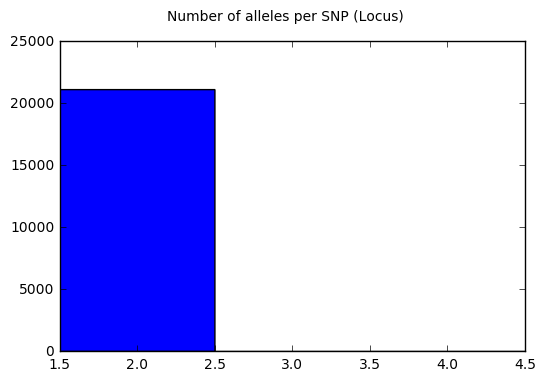

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(n_alleles_list, bins=np.arange(1,5,1) + 0.5)
plt.suptitle("Number of alleles per SNP (Locus)")
plt.show()

In [25]:
plt.close()

In [26]:
print len(loci_list)

21126


<br>
<br>
<br>

### Filtering

In [27]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b8_wgenome'

In [28]:
cd ../scripts/PostStacksFiltering/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts/PostStacksFiltering


In [29]:
!python genBASH_finalfilters.py Input_extraFilters_b8_9-28.txt

In [30]:
# in terminal
!./PostStacksFiltering_b7_wgenome.sh

Before running running this script, please be sure that you have the following:

1. A single folder containing (1) stacks populations output, and (2) batch catalog files

2. These additional python scripts: (1) prep_for_extraFilters.py, (2) preparing_file_for_correcting_genotypes.py, (3) gzip_MBgenotypesverif_BASHshell.sh, (4) MB_genotypes_verif_v2_no_ref.py, (5) genepop_conversion_corrected.py, (6) transpose.py, (7) Eleni_filter_by_MinorAlleleFrequency (8) FilterLoci_by_MissingValues.py.

3. The INPUT text file, UPDATED FOR YOUR DATA

Are you ready for the script to run?
^C


In [ ]:
python Eleni_filter_by_MinorAlleleFrequency_takeARGS.py ../../stacks_b8_wgenome/batch_7.CorrectedGenotypes_biallelic_TRANSPOSED.csv \
../../stacks_b8_wgenome/batch_8.filteredMAF_outputFreqs \
../../stacks_b8_wgenome/batch_8.filteredMAF \
../../stacks_b8_wgenome/batch_8.MAFfiltering_BADgenotypes \
../../stacks_b8_wgenome/batch_8.MAFfiltering_blacklistedMAF

**7,841 Loci**

In [32]:
!python filter_individs_missing_data.py -h

usage: filter_individs_missing_data.py [-h] [-f INPUT] [-og OUTPUT_GOOD]
                                       [-ob OUTPUT_BAD]
                                       [-op OUTPUT_PROPORTIONS]
                                       [-s STACKS_PATH] [-p PERCENT]

filter individuals for missing data. for use after Eleni's MAF filtering.
assumes individuals are *columns* and loci are rows

optional arguments:
  -h, --help            show this help message and exit
  -f INPUT, --input INPUT
                        genotype file in 2 x 2 matrix
  -og OUTPUT_GOOD, --output_good OUTPUT_GOOD
                        output file containing 'good' loci
  -ob OUTPUT_BAD, --output_bad OUTPUT_BAD
                        output file containing 'bad' loci
  -op OUTPUT_PROPORTIONS, --output_proportions OUTPUT_PROPORTIONS
                        output file containing the missing data per individual
  -s STACKS_PATH, --stacks_path STACKS_PATH
                        path to the directory containing your

In [34]:
!python filter_individs_missing_data.py \
-f batch_8.filteredMAF \
-og batch_8.filteredMAF_filteredIndivids30 \
-ob batch_8.filteredMAF_filteredIndivids30_BAD \
-op batch_8.filteredMAF_filteredIndivids30_freqs \
-s../../stacks_b8_wgenome \
-p 0.30

Transposing matrix...
calculating which individuals are missing too much data...
Deleting temporary file...
writing individuals to files...
done.
Total individuals processed:  326
Individuals retained:  306
Individuals removed:  20
Missing data info per individual can be found in the 'proportions' output file.


*Created a new population map that excluded the individuals filtered out for missing data*

#### 9/29/2017

In [2]:
cd ../scripts/PostStacksFiltering/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts/PostStacksFiltering


*My missing loci data script assumes sample are column headers; I need to transpose my file first*

In [11]:
!head transpose.py

## This script was written by Dan Drinan and transposes the rows and columns of a haplotype file
#python transpose.py batch_2_corrected_genotypes_2_alleles_genepop.txt batch_2_corrected_genotypes_2_alleles_genepop_transposed.txt

import sys

input_file = open(sys.argv[1], 'r')

header = True
matrix_of_data = []



In [16]:
!python transpose.py \
../../stacks_b8_wgenome/batch_8.filteredMAF_filteredIndivids30 \
../../stacks_b8_wgenome/batch_8.filteredMAF_filteredIndivids30_TRANSPOSED

In [17]:
!head genMissingLoci.py

### This file generates Eleni's Missing Loci filtering file ###

## MF 2/24/2017

## Arguments: 
##-- population map



#########################


In [18]:
!python genMissingLoci.py ../PopMap_L1-5_mdFilter_b8.txt

You have 9 populations.
These are your populations, with the number of samples in each:
OrderedDict([('Pohang15', 34), ('Geoje15', 37), ('Namhae15', 19), ('YellowSea16', 30), ('Jukbyeon07', 37), ('JinhaeBay07', 44), ('JinhaeBay08', 46), ('Boryeong07', 24), ('Geoje14', 35)])


*Had to edit script because it assumes that it is splitting by ","*

In [21]:
!head -n 15 FilterLoci_by_MissingValues.py

### This scripts removes loci with too much missing data (you set the threshold)
#Adjusted from Eleni's script (June 15,2015) to take arguments
#MF 2/28/2017

#################


import sys

# Open your files for reading and writing
genotypes_file = open(sys.argv[1],'r')
clean_output_file = open(sys.argv[2],'w')
blacklisted_output_file = open(sys.argv[3], 'w')

#run for loop to counting missing genotypes by locus for each population


In [23]:
!python FilterLoci_by_MissingValues.py \
../../stacks_b8_wgenome/batch_8.filteredMAF_filteredIndivids30_TRANSPOSED \
../../stacks_b8_wgenome/batch_8.filteredMAF_filteredIndivids30_filteredLoci \
../../stacks_b8_wgenome/batch_8.filteredMAF_filteredIndivids30_filteredLoci_BAD

processed 7841 loci
Number of loci removed: 1822


In [24]:
print "LOCI REMAINING ", 7841-1822

LOCI REMAINING  6019


<br>
<br>
<br>

### HWE Filtering

** Convert file to genepop format**


In [25]:
!python csv_conversion_forGENEPOP.py -h

usage: csv_conversion_forGENEPOP.py [-h] [-f INPUT] [-o OUTPUT] [-m POPMAP]
                                    [-pm PATH_POPMAP] [-ps PATH_STACKS]
                                    [-t TITLE] [-split SPLIT_BY]

convert matrix file (samples as column headers) to a genepop file.

optional arguments:
  -h, --help            show this help message and exit
  -f INPUT, --input INPUT
                        2 x 2 matrix file with samples as column headers, one
                        row per locus.
  -o OUTPUT, --output OUTPUT
                        output file in genepop format
  -m POPMAP, --popmap POPMAP
                        population map file
  -pm PATH_POPMAP, --path_popmap PATH_POPMAP
                        path to population map file
  -ps PATH_STACKS, --path_stacks PATH_STACKS
                        path to stacks files, including input file
  -t TITLE, --title TITLE
                        title for your genepop file
  -split SPLIT_BY, --split_by SPLIT_BY
                 

In [26]:
!python csv_conversion_forGENEPOP.py \
-f batch_8.filteredMAF_filteredIndivids30_filteredLoci \
-o batch_8_filteredMAF_filteredIndivids30_filteredLoci_genepop.txt \
-m PopMap_L1-5_mdFilter_b8.txt \
-pm ../ \
-ps ../../stacks_b8_wgenome \
-t "Korean Pacific cod filtered final genepop for HWE filtering, stacks b8, MF 9/29/2017" \
-split "space"

You have 9 populations.
These are your populations, with the number of samples in each:
OrderedDict([('Pohang15', 34), ('Geoje15', 37), ('Namhae15', 19), ('YellowSea16', 30), ('Jukbyeon07', 37), ('JinhaeBay07', 44), ('JinhaeBay08', 46), ('Boryeong07', 24), ('Geoje14', 35)])
creating script for part 2...
calling script for part 2...
transposing genotypes matrix...
writing loci into genepop file...
writing genotypes into genepop file by population...
done.


** Parse GENEPOP output**

In [27]:
cd ../../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


In [28]:
!python parse_genepop_HWEbylocus.py -h

usage: parse_genepop_HWEbylocus.py [-h] [-p P] [-op OUTPUTPVAL]
                                   [-of OUTPUTFIS]

optional arguments:
  -h, --help            show this help message and exit
  -p P, --P P           path & name of .P file output from genepop
  -op OUTPUTPVAL, --OUTPUTpval OUTPUTPVAL
                        path & name of the output file for the parsed HWE
                        pvalues
  -of OUTPUTFIS, --OUTPUTfis OUTPUTFIS
                        path & name of the output file for the parsed Fis
                        values


In [29]:
!python parse_genepop_HWEbylocus.py \
-p ../stacks_b8_wgenome/batch_8_filteredMAF_filteredIndivids30_filteredLoci_genepop.txt.P \
-op HWE/batch8/batch_8_HWEpvals_parsed.txt \
-of HWE/batch8/batch_8_HWEfis_parsed.txt

generating dictionaries of pvalues and fis values...
writing output to files...
done.


**Graph Distribution Before Filtering**

In [30]:
cd HWE/batch8

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/HWE/batch8


In [31]:
infile = open("batch_8_HWEpvals_parsed.txt", "r")

percents = []
loci_list = []
na_count = 0

for line in infile:
    if "locus" not in line:
        if line.strip().split()[10]:
            new_percent = float(line.strip().split()[10])
            percents.append(new_percent)
            loci_list.append(line.strip().split()[0])

infile.close()

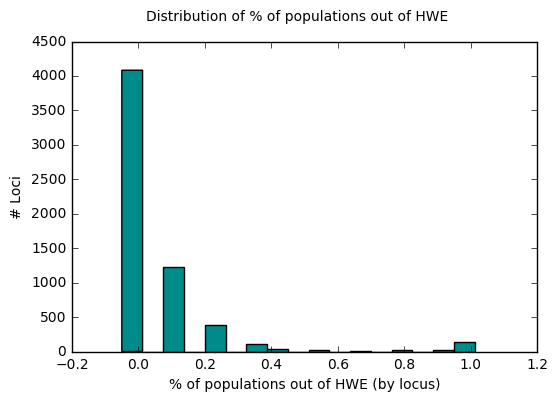

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(percents, bins = np.arange(-0.1, 1, .0625)+0.05, color = "darkcyan")
plt.suptitle("Distribution of % of populations out of HWE")
plt.xlabel("% of populations out of HWE (by locus)")
plt.ylabel("# Loci")
plt.show()

In [33]:
plt.close()

**Multiple testing + Chi square Technique**

In [34]:
from scipy.stats import chisqprob
import numpy as np

## STEP ONE: conduct chisquare and determine loci out of HWE. 
## write results to a file and save a list of the loci out of HWE. 

infile = open("batch_8_HWEpvals_parsed.txt", "r")
outfile = open("batch_8_HWEchisquare.txt", "w")

outfile.write("locus\tChiSquare\tdf\tpvalue\n")

sig_count = 0
loci_to_discard = []

for line in infile:
    if "locus" not in line:
        linelist= line.strip().split()
        outfile.write(linelist[0]) #write locus name to outfile
        sum = 0 #sum of ln(pvals)
        n_pops = 0 # number of pops with pvals (some will have NAs)
        for i in range(1,8):
            if linelist[i] != "NA" and float(linelist[i]) == 0.0:
                newval = np.log(float(0.00000000001))
                sum += newval
                n_pops += 1
            elif linelist[i] != "NA" and float(linelist[i]) != 0.0:
                newval = np.log(float(linelist[i]))
                sum += newval
                n_pops += 1
        chisquare = float(-2) * float(sum)
        df = n_pops * 2
        outfile.write("\t" + str(chisquare) + "\t" + str(df))
        pvalue = chisqprob(chisquare,df)
        if pvalue < 0.05:
            sig_count += 1
            loci_to_discard.append(linelist[0])
        outfile.write("\t" + str(pvalue) + "\n")
infile.close()
outfile.close()

print "You have ", sig_count, " loci out of HWE."

You have  614  loci out of HWE.


In [35]:
## STEP TWO: rewrite the file of HWEpvals by locus by population, 
## excluding those loci out of HWE. 

infile = open("batch_8_HWEpvals_parsed.txt", "r")
outfile = open("batch_8_HWEpvals_filtered.txt", "w")

locus_count = 0

for line in infile:
    if line.startswith("#"):
        outfile.write("# parsed GENEPOP output, HWE p-values by locus by population FILTERED #\n")
    elif line.startswith("locus"):
        outfile.write(line)
    else:
        locus = line.strip().split()[0]
        if locus not in loci_to_discard:
            outfile.write(line)
            locus_count += 1
infile.close()
outfile.close()
print locus_count, " loci written to output file."

5405  loci written to output file.


**New Distribution**

In [36]:
infile = open("batch_8_HWEpvals_filtered.txt", "r")

percents = []
loci_list = []

for line in infile:
    if "locus" not in line and "#" not in line:
        new_percent = float(line.strip().split()[10])
        percents.append(new_percent)
        loci_list.append(line.strip().split()[0])

infile.close()

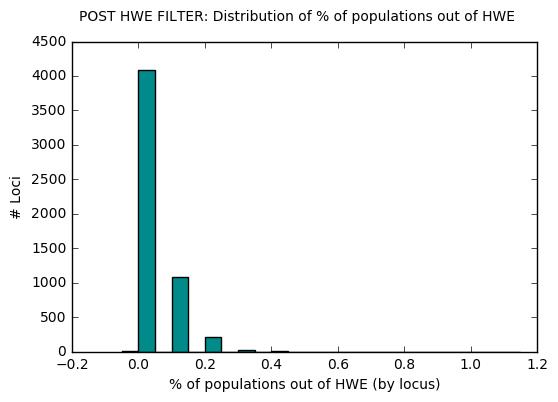

In [37]:
import numpy as np
import matplotlib.pyplot as plt


plt.hist(percents, bins = np.arange(-0.1, 1.1, .05)+0.05, color = "darkcyan")
plt.suptitle("POST HWE FILTER: Distribution of % of populations out of HWE")
plt.xlabel("% of populations out of HWE (by locus)")
plt.ylabel("# Loci")
plt.show()

In [38]:
plt.close()

**Remove loci out of HWE from the final filtered file**


In [39]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/HWE/batch8'

In [40]:
cd ../../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


In [43]:
old = open("../stacks_b8_wgenome/batch_8.filteredMAF_filteredIndivids30_filteredLoci", "r")
locifile = open("HWE/batch8/batch_8_HWEpvals_filtered.txt", "r")
new = open("../stacks_b8_wgenome/batch_8.filteredMAF_filteredIndivids30_filteredLoci_filteredHWE.txt", "w")
blacklisted = open("../stacks_b8_wgenome/batch_8.filteredMAF_filteredIndivids30_filteredLoci_filteredHWE_BAD.txt", "w")

## Note that my matrix file here has loci as column header, so I need to transpose it!
data_matrix = []
for line in old:
	tmp_line = ''
	tmp_line += line.strip()
	data_matrix.append(tmp_line.split(' '))
old.close()


#write sample names to new file
new.write("\t".join(data_matrix[0]) + "\n")
blacklisted.write("\t".join(data_matrix[0]) + "\n")

#get list of loci that should be retained
loci_to_keep = []

for line in locifile: 
    if "locus" not in line:
        loci_to_keep.append(line.strip().split()[0]) 
locifile.close()

print "Preparing to copy ", len(loci_to_keep), " loci from old file"
print ""


cp_count = 0
rm_count = 0
loci_kept = []

for line in data_matrix[1:]: 
    locusID = line[0]
    if locusID in loci_to_keep:
        new.write("\t".join(line) + "\n")
        cp_count += 1
        loci_kept.append(locusID)
    else:
        blacklisted.write("\t".join(line) + "\n")
        rm_count += 1
new.close()
blacklisted.close()

print "Wrote ", cp_count, " loci to new matrix file."
print "Removed ", rm_count, " loci."

if len([i for i in loci_to_keep if i in loci_kept]) == len(loci_to_keep):
    print "All loci to keep were copied."
else:
    print "uhoh! not all loci to keep were copied."
    print "the following loci were not copied over:"
    print [i for i in loci_to_keep if i not in loci_kept]

Preparing to copy  5405  loci from old file

Wrote  5405  loci to new matrix file.
Removed  614  loci.
All loci to keep were copied.


** Create Final Genepop **

In [44]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo


In [48]:
!python scripts/PostStacksFiltering/csv_conversion_forGENEPOP.py \
-f batch_8.filteredMAF_filteredIndivids30_filteredLoci_filteredHWE.txt \
-o batch_8_filteredMAF_filteredIndivids30_filteredLoci_filteredHWE.gen \
-m PopMap_L1-5_mdFilter_b8.txt \
-pm scripts \
-ps stacks_b8_wgenome \
-t "Korean Pacific cod filtered final genepop, stacks batch 8 MF 9/29/2017" \
-split "tab"

You have 9 populations.
These are your populations, with the number of samples in each:
OrderedDict([('Pohang15', 34), ('Geoje15', 37), ('Namhae15', 19), ('YellowSea16', 30), ('Jukbyeon07', 37), ('JinhaeBay07', 44), ('JinhaeBay08', 46), ('Boryeong07', 24), ('Geoje14', 35)])
creating script for part 2...
calling script for part 2...
transposing genotypes matrix...
writing loci into genepop file...
writing genotypes into genepop file by population...
done.


### FINAL GENEPOP FILE: `batch_8.filteredMAF_filteredIndivids30_filteredLoci_filteredHWE.gen`